- https://www.kaggle.com/code/ryanholbrook/trend/tutorial
- https://www.kaggle.com/competitions/store-sales-time-series-forecasting
- https://www.kaggle.com/code/johnkflam/exercise-linear-regression-with-time-series/edit
- https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a

In [1]:
# %load ../../import_matplot.py
import pandas as pd
import jlam.eda_util as edu
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_rows',500)

# global settings
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11,5))
plt.rc("axes", 
           labelweight="bold", labelsize="large",
           titleweight="bold", titlesize=14, titlepad=10
          )

In [2]:
import data_prep_util as dpu

In [3]:
df_r = dpu.get_data_electric_production_raw()
df_p = dpu.process_data(df_r)

In [4]:
# df_p['time'] = np.arange(len(df_p))
df_p.head()

,prod_date,production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [5]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   prod_date   397 non-null    datetime64[ns]
 1   production  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [6]:
df_prod = df_p.set_index('prod_date').to_period()
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 397 entries, 1985-01 to 2018-01
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


<AxesSubplot:xlabel='prod_date'>

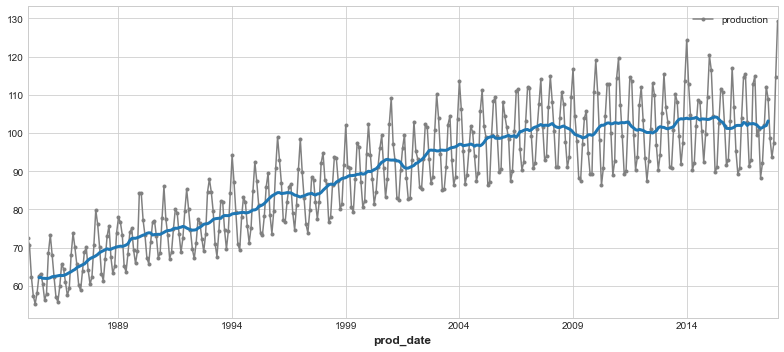

In [7]:
moving_average = df_prod.rolling(
    window=12, # yearly window
    center=True
).mean()

ax = df_prod.plot(style=".-", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, legend=False
)

In [8]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 397 entries, 1985-01 to 2018-01
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [9]:
moving_average.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 397 entries, 1985-01 to 2018-01
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  386 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


### Understand rolling windows

In [10]:
df_m=pd.merge(df_prod,moving_average, left_index=True, right_index=True)
df_m

,production_x,production_y
prod_date,,
1985-01,72.5052,NaN
1985-02,70.6720,NaN
1985-03,62.4502,NaN
1985-04,57.4714,NaN
1985-05,55.3151,NaN
1985-06,58.0904,NaN
1985-07,62.6202,62.165667
1985-08,63.2485,62.232375
1985-09,60.5846,62.008617


In [11]:
df_prod[:12].mean()

production    62.165667
dtype: float64

#### deterministic process
- (A deterministic process, by the way, is a technical term for a time series that is non-random or completely determined, like the const and trend series are. Features derived from the time index will generally be deterministic.)

In [12]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [13]:
dp = DeterministicProcess(
    index = df_prod.index, # dates from training data
    constant=True, # dummy feature for the bias (y_intercept)
    order=1, # the time dummy (trend)
    drop=True,  # drop terms if necessary to avoid collinearity
)

# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
prod_date,,
1985-01,1.0,1.0
1985-02,1.0,2.0
1985-03,1.0,3.0
1985-04,1.0,4.0
1985-05,1.0,5.0


### Create Model

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
y = df_prod.production
y.head()

prod_date
1985-01    72.5052
1985-02    70.6720
1985-03    62.4502
1985-04    57.4714
1985-05    55.3151
Freq: M, Name: production, dtype: float64

In [17]:
# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X,y)

Checking X array...
Checking y array...


LinearRegression(fit_intercept=False)

In [19]:
# produces an array
ary0=model.predict(X)
# turn it into a Series
y_pred = pd.Series(ary0, index=X.index)

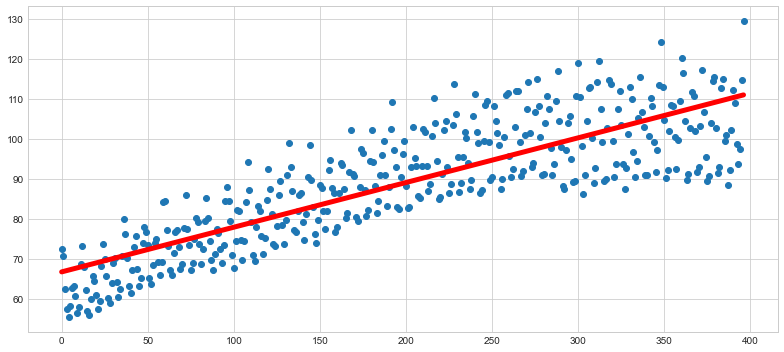

In [29]:
# plotting y vs y_pred
fig, ax = plt.subplots()

# y_pred as line
y0=y_pred.copy()
y0.index=np.arange(len(X))
ax.plot(y0,linewidth=5,color='red')
# y as scatter
y1=y.copy()
y1.index=np.arange(len(X))
plt.scatter(y1.index,y1.values)

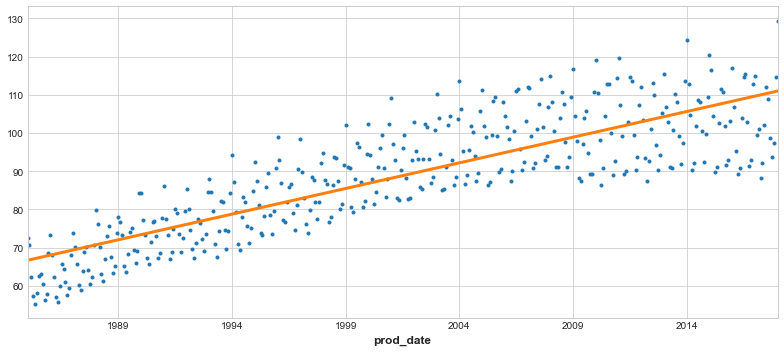

In [33]:
ax = y.plot(style=".")
_ = y_pred.plot(ax=ax,linewidth=3,label="Trend")